# Titanic Dataset

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
(418, 12)


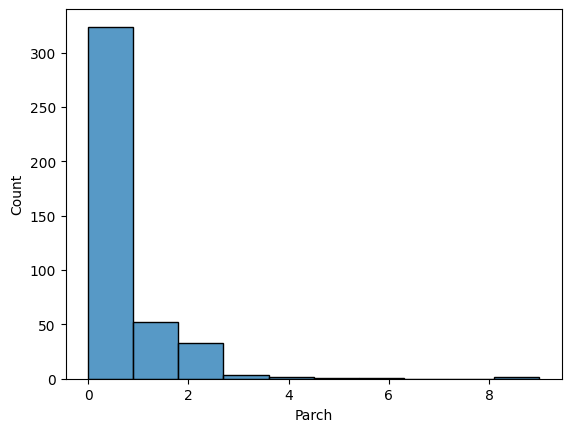

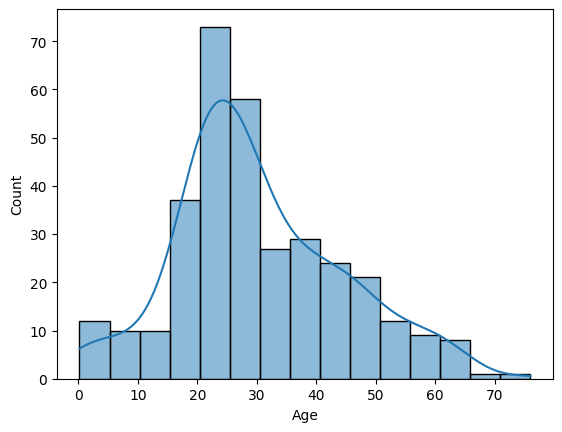

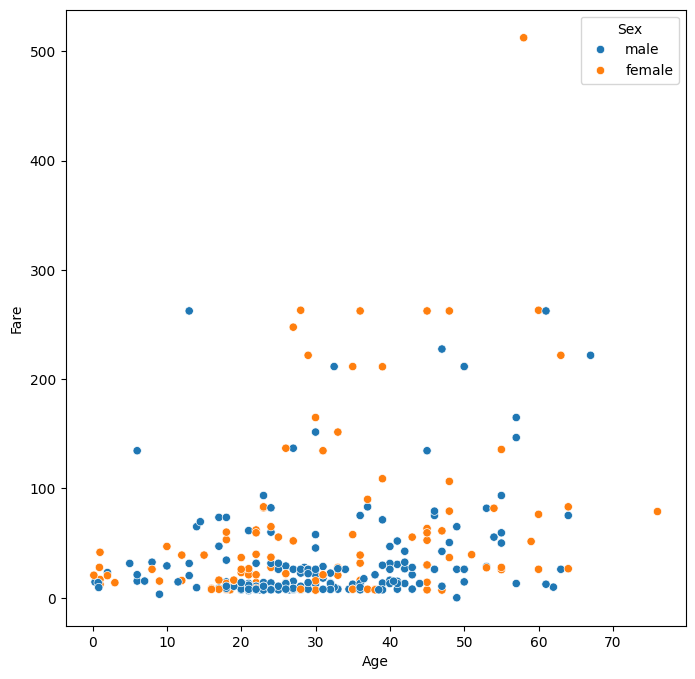

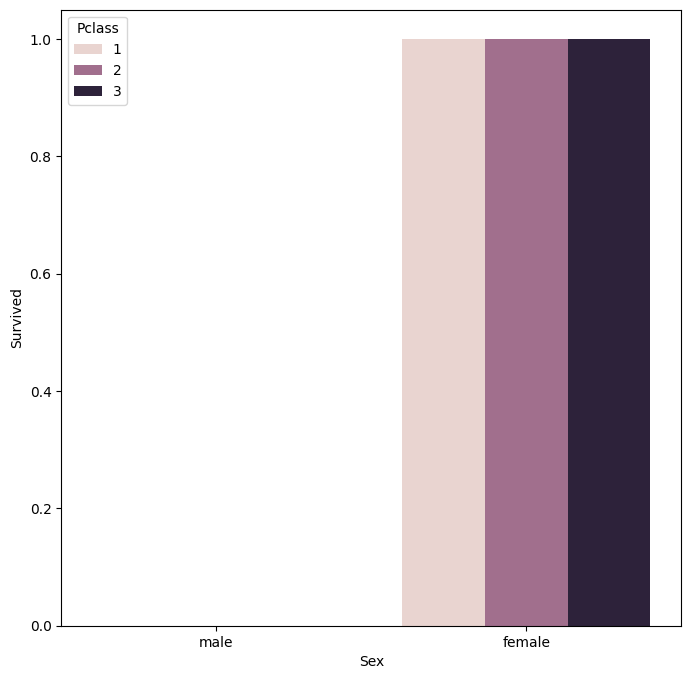

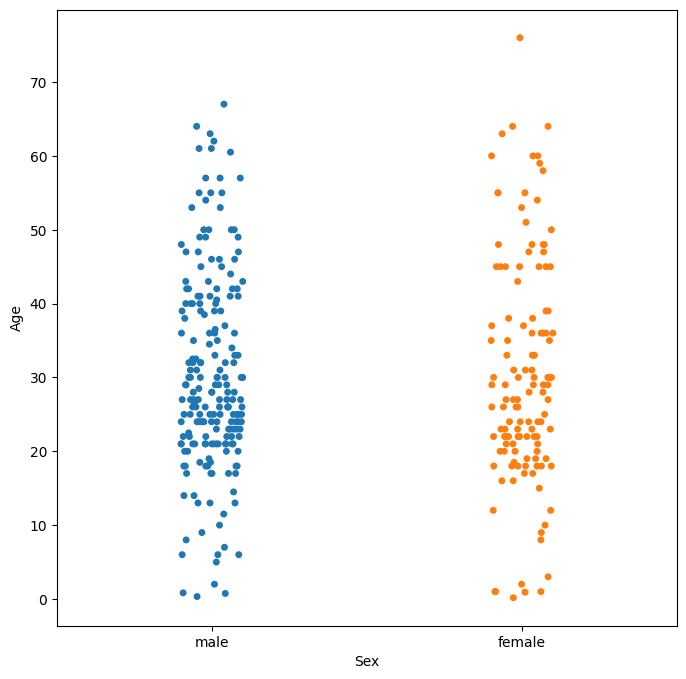

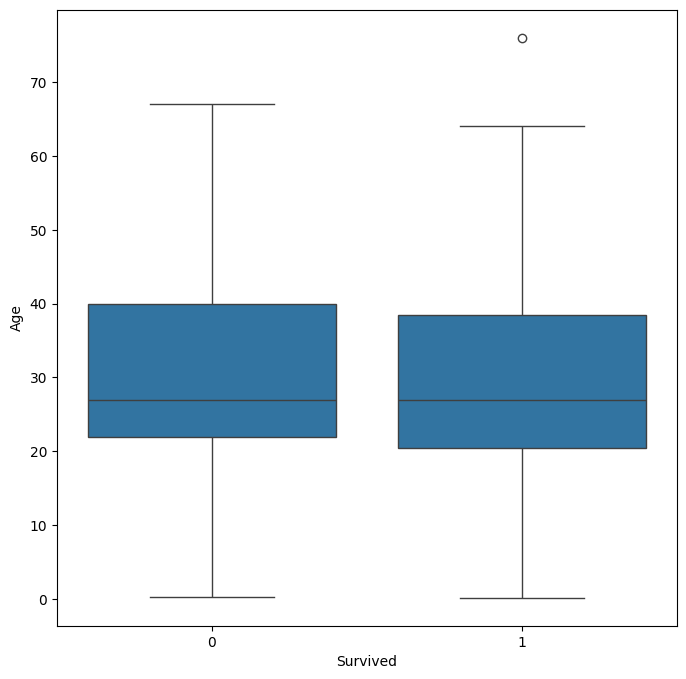

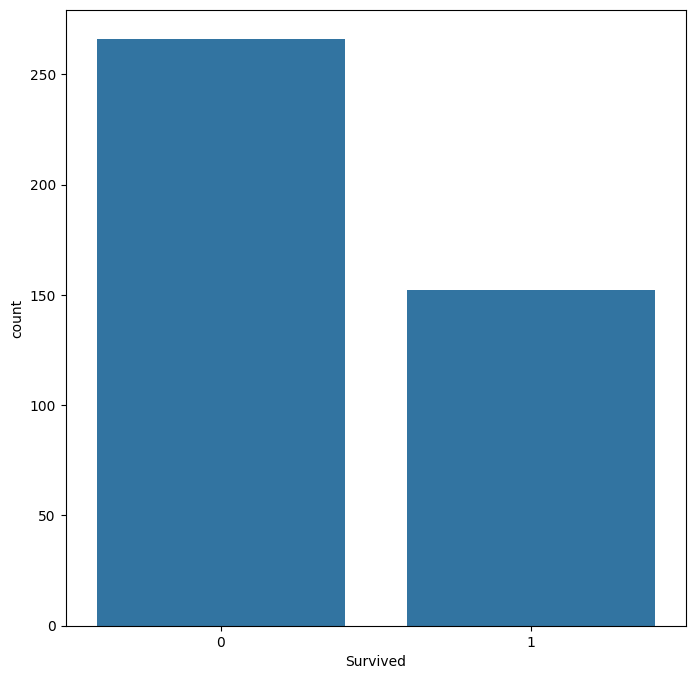

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


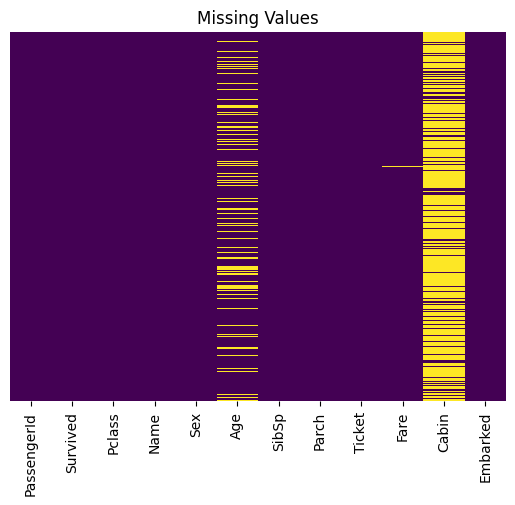

<ipython-input-1-0e195d9c134d>:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Age', data=df, palette='winter').set(title='Age Distribution within classes')


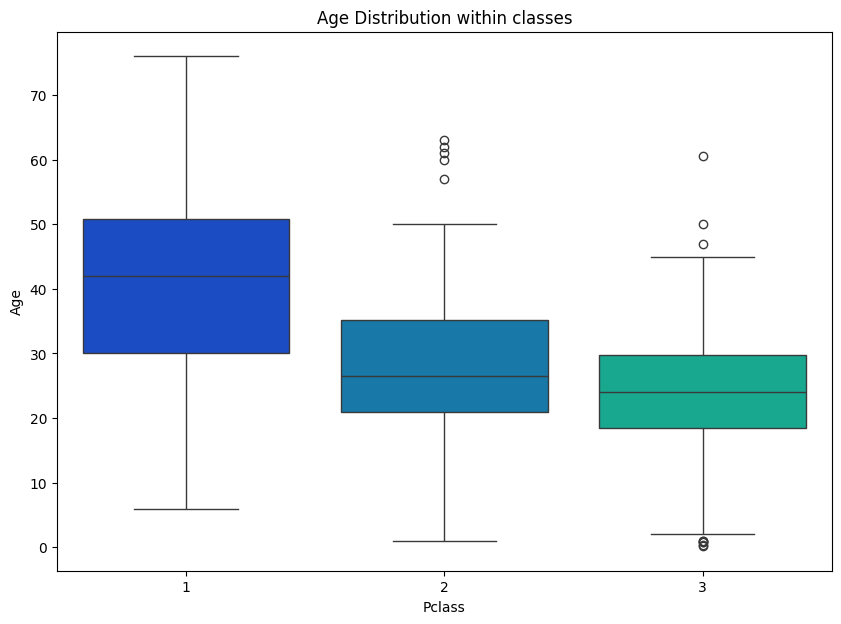

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  417 non-null    int64   
 1   Survived     417 non-null    int64   
 2   Pclass       417 non-null    int64   
 3   Sex          417 non-null    category
 4   Age          417 non-null    float64 
 5   SibSp        417 non-null    int64   
 6   Parch        417 non-null    int64   
 7   Fare         417 non-null    float64 
 8   Embarked     417 non-null    category
dtypes: category(2), float64(2), int64(5)
memory usage: 27.1 KB


<ipython-input-1-0e195d9c134d>:58: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-1-0e195d9c134d>:59: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# Load the data
data = pd.read_csv('titanic.csv')
df = data.copy()

# Display the first few rows of the dataframe
print(df.head())

# Display the shape of the dataframe
print(df.shape)

# Visualize the data
sns.histplot(df['Parch'])
plt.show()

sns.histplot(df['Age'], kde=True)
plt.show()

plt.figure(figsize=(8, 8))
sns.scatterplot(x='Age', y='Fare', hue='Sex', data=df)
plt.show()

plt.figure(figsize=(8, 8))
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df)
plt.show()

plt.figure(figsize=(8, 8))
sns.stripplot(x='Sex', y='Age', hue='Sex', data=df)
plt.show()

plt.figure(figsize=(8, 8))
sns.boxplot(x='Survived', y='Age', data=df)
plt.show()

plt.figure(figsize=(8, 8))
sns.countplot(x='Survived', data=df)
plt.show()

# Display information about the dataframe
df.info()

# Visualize missing values
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

plt.figure(figsize=(10, 7))
sns.boxplot(x='Pclass', y='Age', data=df, palette='winter').set(title='Age Distribution within classes')
plt.show()

# Function to fill missing age values based on Pclass
def inputs_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# Apply the inputs_age function
df['Age'] = df[['Age', 'Pclass']].apply(inputs_age, axis=1)

# Drop the 'Cabin' column and rows with missing values
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df.dropna(inplace=True)

# Convert categorical columns to category type
objcat = ['Sex', 'Embarked']
for colname in objcat:
    df[colname] = df[colname].astype('category')

# Display the updated dataframe information
df.info()

# Drop the 'PassengerId' column
df.drop('PassengerId', axis=1, inplace=True)

# Convert categorical columns to dummy variables
sex = pd.get_dummies(df['Sex'], drop_first=True)
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

# Concatenate the dummy variables with the dataframe
df = pd.concat([df.drop(['Sex', 'Embarked'], axis=1), sex, embarked], axis=1)

# Convert boolean columns to integers
for column in df.select_dtypes(['bool']).columns:
    df[column] = df[column].astype(int)

# Split the data into features and target variable
X = df.drop("Survived", axis=1)
Y = df["Survived"]

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



Evaluating SVM...
Accuracy for SVM: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



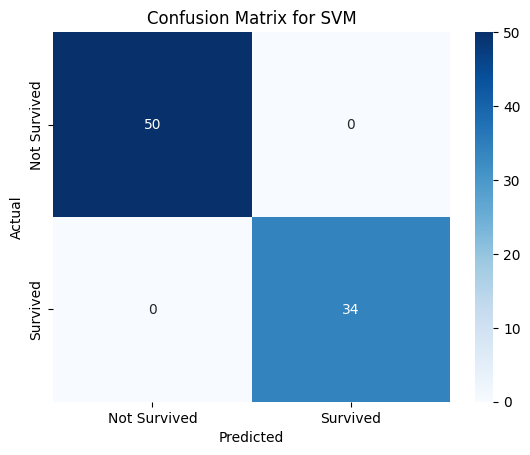

Evaluating Decision Tree...
Accuracy for Decision Tree: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



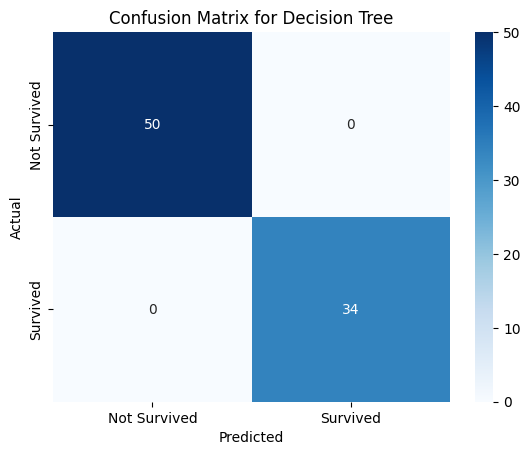

Evaluating Random Forest...
Accuracy for Random Forest: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



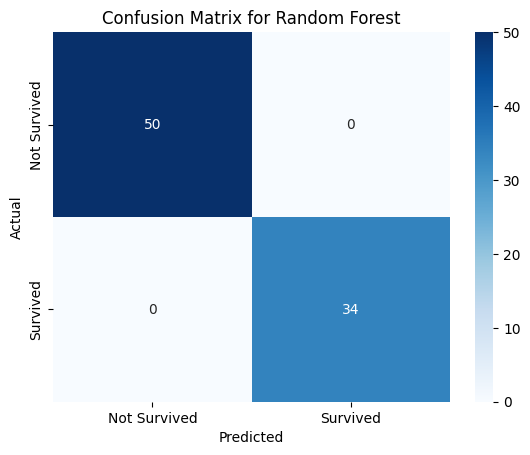

Evaluating XGBoost...
Accuracy for XGBoost: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



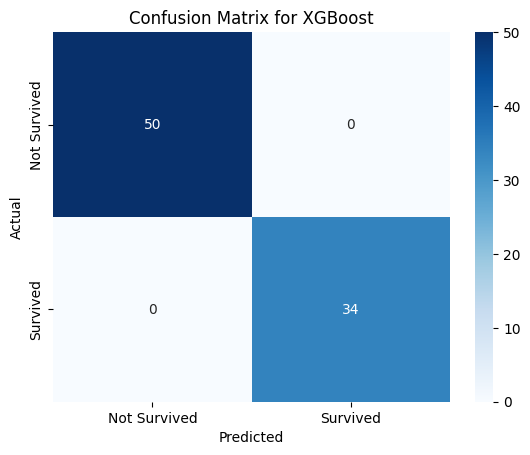

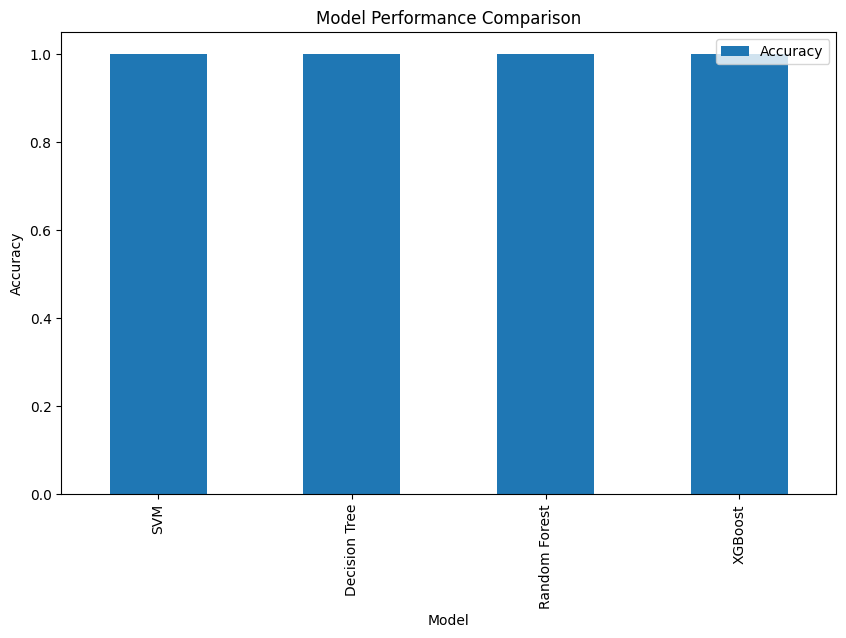

In [2]:
# Install necessary libraries
!pip install scikit-learn==1.5.2 xgboost==1.7.6

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hyperparameter grid for SVM
param_grid_svm = {
    'C': [1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

# Initialize and train the SVM model with GridSearchCV
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
svm_best = grid_search_svm.best_estimator_

# Hyperparameter grid for Decision Tree
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Initialize and train the Decision Tree model with GridSearchCV
tree = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)
tree_best = grid_search_tree.best_estimator_

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize and train the Random Forest model with GridSearchCV
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
rf_best = grid_search_rf.best_estimator_

# Hyperparameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

# Initialize and train the XGBoost model with GridSearchCV
xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
xgb_best = grid_search_xgb.best_estimator_

# Evaluate each model
models = {
    'SVM': svm_best,
    'Decision Tree': tree_best,
    'Random Forest': rf_best,
    'XGBoost': xgb_best
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Confusion Matrix Visualization
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Collect results for comparison
results = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, svm_best.predict(X_test)),
        accuracy_score(y_test, tree_best.predict(X_test)),
        accuracy_score(y_test, rf_best.predict(X_test)),
        accuracy_score(y_test, xgb_best.predict(X_test))
    ]
})

# Bar plot for accuracy comparison
results.plot(x='Model', kind='bar', figsize=(10, 6), title='Model Performance Comparison')
plt.ylabel('Accuracy')
plt.show()



#Iris Dataset

X_train Shape: (120, 4)
X_test Shape: (30, 4)
y_train Shape: (120,)
y_test Shape: (30,)
Evaluating SVM...
Accuracy for SVM: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



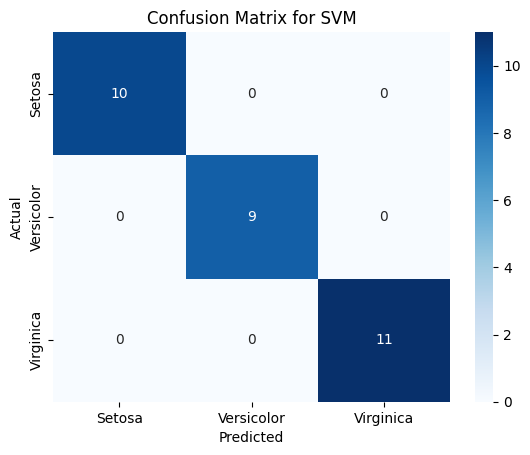

Evaluating Decision Tree...
Accuracy for Decision Tree: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



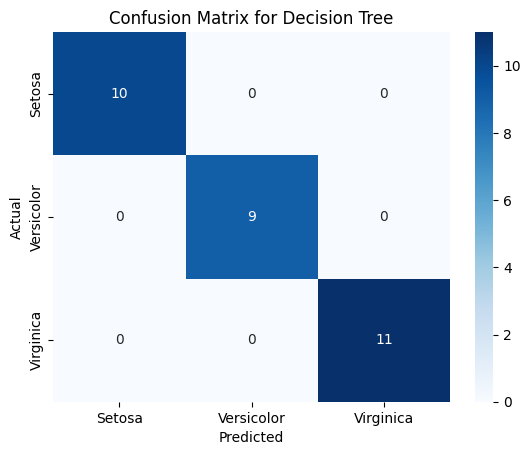

Evaluating Random Forest...
Accuracy for Random Forest: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



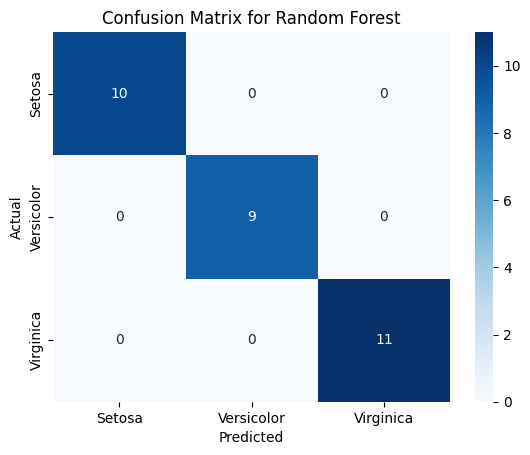

Evaluating XGBoost...
Accuracy for XGBoost: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



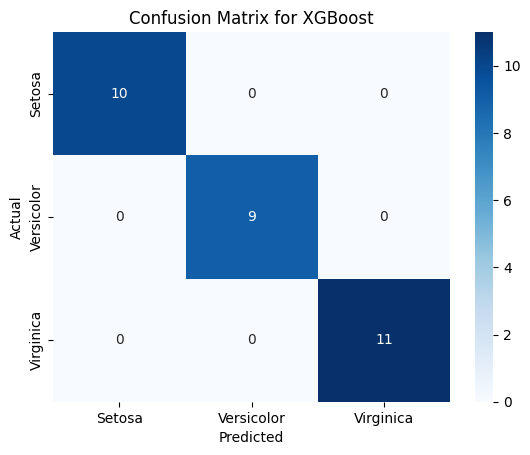

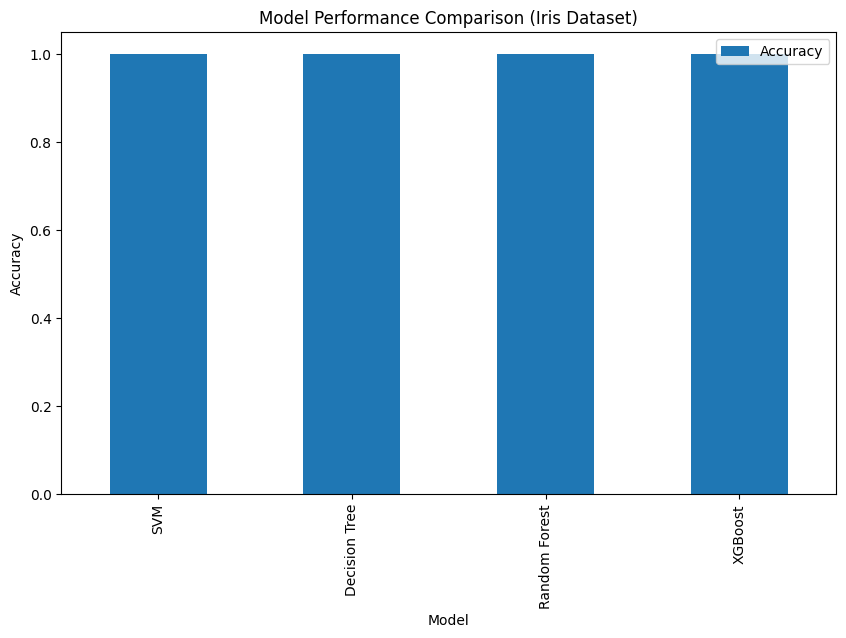

In [3]:

from sklearn.datasets import load_iris

X, Y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

# Hyperparameter grid for SVM with Iris dataset
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize and train the SVM model with GridSearchCV
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
svm_best = grid_search_svm.best_estimator_

# Hyperparameter grid for Decision Tree with Iris dataset
param_grid_tree = {
    'max_depth': [3, 5, 10, None],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 10]
}

# Initialize and train the Decision Tree model with GridSearchCV
tree = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(tree, param_grid_tree, cv=5, scoring='accuracy')
grid_search_tree.fit(X_train, y_train)
tree_best = grid_search_tree.best_estimator_

# Hyperparameter grid for Random Forest with Iris dataset
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize and train the Random Forest model with GridSearchCV
rf = RandomForestClassifier()
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
rf_best = grid_search_rf.best_estimator_

# Hyperparameter grid for XGBoost with Iris dataset
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10]
}

# Initialize and train the XGBoost model with GridSearchCV
xgb = XGBClassifier()
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)
xgb_best = grid_search_xgb.best_estimator_

# Evaluate each model with Iris dataset
models = {
    'SVM': svm_best,
    'Decision Tree': tree_best,
    'Random Forest': rf_best,
    'XGBoost': xgb_best
}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model_name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Confusion Matrix Visualization
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Setosa', 'Versicolor', 'Virginica'], yticklabels=['Setosa', 'Versicolor', 'Virginica'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Collect results for comparison with Iris dataset
results = pd.DataFrame({
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, svm_best.predict(X_test)),
        accuracy_score(y_test, tree_best.predict(X_test)),
        accuracy_score(y_test, rf_best.predict(X_test)),
        accuracy_score(y_test, xgb_best.predict(X_test))
    ]
})

# Bar plot for accuracy comparison with Iris dataset
results.plot(x='Model', kind='bar', figsize=(10, 6), title='Model Performance Comparison (Iris Dataset)')
plt.ylabel('Accuracy')
plt.show()